In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('./Train.csv')
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [3]:
df.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [4]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
from sklearn.preprocessing import LabelEncoder

df_new = df

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le = LabelEncoder()
df_new
for c in cat:
    df_new[c] = le.fit_transform(df[c])

In [6]:
df_new['Segmentation'] = df_new['Segmentation'].replace(['A', 'B', 'C', 'D'], [1, 2, 3, 4])
df_new = df_new.dropna()
df_new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,4
2,466315,0,1,67,1,2,1.0,2,1.0,5,2
3,461735,1,1,67,1,7,0.0,1,2.0,5,2
5,461319,1,1,56,0,0,0.0,0,2.0,5,3
6,460156,1,0,32,1,5,1.0,2,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,9,0.0,2,7.0,0,4
8064,464685,1,0,35,0,4,3.0,2,4.0,3,4
8065,465406,0,0,33,1,5,1.0,2,1.0,5,4
8066,467299,0,0,27,1,5,1.0,2,4.0,5,2


In [7]:
df_f = df_new.iloc[:, 1:-1]
df_t = df_new.iloc[:,-1]

In [8]:
df_f.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
count,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000,6969.000000
mean,0.549146,0.612713,43.469364,0.644282,2.799541,2.633089,1.349978,2.844167,4.183671
std,0.497614,0.517727,16.531090,0.496424,2.605659,3.402505,0.852783,1.528469,1.431907
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,41.000000,1.000000,3.000000,1.000000,2.000000,3.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_f = scaler.fit_transform(df_f)

In [10]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

/var/folders/l4/ngfzh79n7kl3fb2wpwpc9zj80000gn/T/ipykernel_16922/3307523716.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))


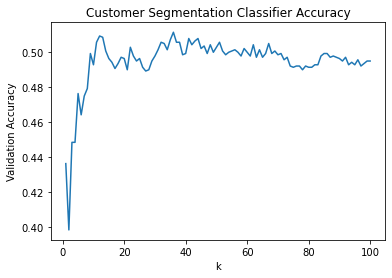

35


In [11]:
train_X, test_X, train_Y, test_Y = np.array(train_test_split(df_f, df_t, test_size = 0.2, random_state = 100))

k_list = range(1,101)
accuracies = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(train_X, train_Y.ravel())
  accuracies.append(knn.score(test_X, test_Y))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Customer Segmentation Classifier Accuracy")
plt.show()
max_index_col = np.argmax(accuracies, axis=0)
print(max_index_col) # finding the best k value

In [12]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(train_X, train_Y.ravel())

print(knn.score(test_X, test_Y))

0.5071736011477762


In [13]:
test = pd.read_csv('./Test.csv')
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [14]:
test = test.iloc[:, 1:]

cat = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

le_test = LabelEncoder()

for c in cat:
    test[c] = le.fit_transform(test[c])
    
test = test.dropna()

In [15]:
scaler = MinMaxScaler()
test_set = test.copy()
test_set = scaler.fit_transform(test_set)
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,0,1,69,0,9,0.0,2,1.0,5
3,1,1,59,0,4,11.0,1,2.0,5
5,1,1,47,1,1,0.0,1,5.0,3
...,...,...,...,...,...,...,...,...,...
2621,0,0,35,1,3,1.0,2,2.0,5
2622,1,0,29,0,5,9.0,2,4.0,5
2623,0,0,35,1,1,1.0,2,1.0,5
2625,1,1,47,1,4,1.0,1,5.0,3


In [16]:
pred = knn.predict(test_set)
test['Segmentation'] = pred

In [17]:
df_a = test[test['Segmentation'] == 1]
df_a.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.0
mean,0.518198,0.596187,45.906412,0.623917,2.478336,2.663778,1.781629,2.197574,4.083189,1.0
std,0.500102,0.551059,17.612286,0.502407,2.479772,3.518989,0.537622,1.338192,1.431301,0.0
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,1.0
50%,1.000000,1.000000,41.000000,1.000000,2.000000,1.000000,2.000000,2.000000,5.000000,1.0
75%,1.000000,1.000000,55.000000,1.000000,3.000000,4.000000,2.000000,3.000000,5.000000,1.0
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,1.0


In [18]:
df_b = test[test['Segmentation'] == 2]
df_b.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,444.00000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0
mean,0.43018,0.822072,50.290541,0.709459,2.734234,2.421171,1.139640,2.565315,4.132883,2.0
std,0.49566,0.437889,14.779609,0.478712,2.668536,3.163077,0.872637,1.533012,1.391006,0.0
min,0.00000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.0
25%,0.00000,1.000000,39.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.0
50%,0.00000,1.000000,47.000000,1.000000,2.000000,1.000000,1.000000,2.000000,5.000000,2.0
75%,1.00000,1.000000,60.000000,1.000000,4.000000,4.000000,2.000000,4.000000,5.000000,2.0
max,1.00000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,2.0


In [19]:
df_c = test[test['Segmentation'] == 3]
df_c.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.0
mean,0.601019,1.011885,51.069610,0.943973,1.186757,2.191851,0.458404,2.872666,4.497453,3.0
std,0.490105,0.123145,12.553704,0.264547,1.941078,2.934466,0.660126,1.191987,1.262520,0.0
min,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.0
25%,0.000000,1.000000,42.000000,1.000000,0.000000,0.000000,0.000000,2.000000,5.000000,3.0
50%,1.000000,1.000000,49.000000,1.000000,0.000000,1.000000,0.000000,3.000000,5.000000,3.0
75%,1.000000,1.000000,59.000000,1.000000,2.000000,3.000000,1.000000,4.000000,5.000000,3.0
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,3.0


In [20]:
df_d = test[test['Segmentation'] == 4]
df_d.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.0
mean,0.602740,0.144597,29.882801,0.308980,4.695586,2.850837,1.981735,3.547945,3.983257,4.0
std,0.489704,0.377054,11.684885,0.475428,2.155225,3.568874,0.155100,1.753368,1.521600,0.0
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.0
25%,0.000000,0.000000,22.000000,0.000000,3.000000,0.000000,2.000000,2.000000,3.000000,4.0
50%,1.000000,0.000000,28.000000,0.000000,5.000000,1.000000,2.000000,4.000000,5.000000,4.0
75%,1.000000,0.000000,32.000000,1.000000,5.000000,5.000000,2.000000,5.000000,5.000000,4.0
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000,4.0


In [21]:
test.to_csv('prediction.csv', index=False)